In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import sys
sys.path.append('..')

import modules.plotting as pl
import modules.phase_detection as pde
import modules.linear_algebra as lin
import modules.sliding_window as sw
import modules.numpy_funcs as nf
import modules.iterable_funcs as itf

In [19]:
step_signal = np.array([-95.35838317, -80.71503535, -74.37771039, -68.60583215,
       -69.56591953, -71.03885842, -86.82829435, -78.43642353,
       -72.39930357, -59.41361826, -40.28939169, -33.57524692,
       -23.53434923, -15.45314141, -12.31169806, -10.8661896 ,
        -9.3548587 , -15.02467074, -17.98200379, -13.80473506,
       -15.40943018, -12.39406677,  -8.48920144, -12.11673424,
       -11.23004604,  -8.83755062,  -6.32491464,  -8.4482471 ,
        -5.44261609,  -1.09462891,   3.52956037,  11.61027888,
        21.0352981 ,  30.11856214,  42.32152708,  47.62155423,
        74.20682339,  87.74193871,  95.38055977,  98.09930006,
        99.93372835, 103.09604729,  98.92156432, 101.27847256,
        96.32521906,  98.16084073,  96.82692884,  95.96048376,
        93.14718708,  97.81602738,  99.39364809, 102.4696047 ,
        99.71741285, 103.43743202, 100.57423243, 103.9822279 ,
       101.519331  , 109.82574405, 114.62583515, 122.84833033,
       141.56976316, 142.71496024, 145.94428853, 146.349223  ,
       144.04363341])

In [69]:
pad_width = 3
cluster_values = sw.apply_to_padded(step_signal, np.var, pad_width,
                                    'reflect', reflect_type='odd')

cluster_array = nf.to_column(cluster_values)

k_means = KMeans(n_clusters=2, random_state=0).fit(cluster_array)

stance_label = np.argmin(k_means.cluster_centers_)
is_stance = k_means.labels_ == stance_label

In [70]:
# Remove small groups of consecutive stance frames, because these could
# be false positives.
is_stance = nf.filter_consecutive_true(is_stance, min_length=10)

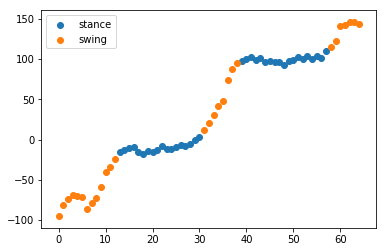

In [71]:
indices = [i for i, _ in enumerate(step_signal)]
points = np.column_stack((indices, step_signal))

pl.scatter_labels(points, ~is_stance)

plt.legend(['stance', 'swing'])